<h1>VQA: Visual Question Answering<h1/>

# 1. Task Overview:

## 1.1 Introduction:

With rapid advancements in the field of AI using deep learning methods, the fields of Computer Vision and NLP have individually witnessed a lot of state-of-the-art research.

A renewed excitement has now emerged in the field of multi-discipline Artificial Intelligence (AI) research problems which tries to generate multi-modal knowledge beyond a single sub-domain (such as CV or NLP).

In particular, research in image and video captioning that combines Computer Vision (CV), Natural Language Processing (NLP),
and Knowledge Representation & Reasoning (KR) has dramatically increased. Another such task is the **Visual Question Answering(VQA)**.

## 1.2 Problem-Statement:

Visual Question answering is the task to correctly produce a natural-language answer to a free-form and open-ended natural-language question regarding an input image.

This could make for a compelling “[AI-Complete](https://en.wikipedia.org/wiki/AI-complete)” task.

A few examples of the VQA task are shown below:

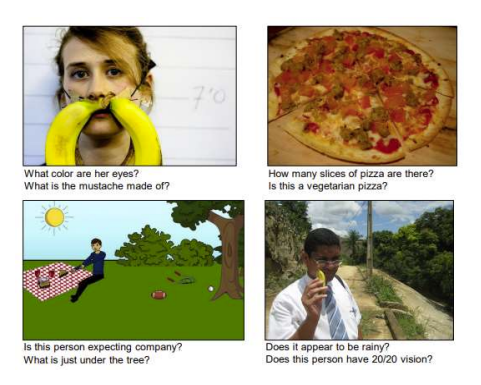

The questions being open ended, solving the VQA task requires the model to develop knowledge in various subproblems such as:

- 'Object recognition' (ex: "What is in the image?"),
- 'Object detection' (ex: "How many bikes are there?"),
- 'Counting' (ex: "How many bikes are there?"),
- 'Image scene classification' (ex: "Is it snowing?")
- 'Activity recognition' (ex: "Is this man crying?")
- 'Spatial relationships among objects in the image' (ex: "What is just under the tree?")
- 'Knowledge-base reasoning' and 'Commonsense reasoning' (ex: "Is the man crying?")

And many more…

## 1.3 Sources/Useful Links:

- Source:
    - https://arxiv.org/pdf/1505.00468.pdf
    - https://visualqa.org/

____ Useful Links ____
- Survey blogs:
    - https://blog.paperspace.com/introduction-to-visual-question-answering/
    - https://arxiv.org/pdf/1909.01860.pdf
    - https://arxiv.org/pdf/2010.08189.pdf

## 1.4 Goal of VQA:

- This goal-driven task is applicable to scenarios encountered when visually-impaired users or intelligence analysts actively elicit the
visual information.
- Being a compelling AI-complete task, it also encourages more research on multi-modal knowledge to reach a stage of solving AI-complete tasks.

# 2. Mapping the real-world problem to an ML/DL problem:

The research performed in VQA includes the following types of questions and answers:
- Free-form, open-ended questions, where the answers could be words, phrases, and even complete sentences.
- Object counting questions, where the answer involves counting the number of objects in one image.
- Multiple-choice questions.
- Yes/No binary questions.

The above-mentioned types can be viewed as the following ML/DL problems:
1. The multiple-choice and Yes/No can be viewed as classification problems, where deep models infer the candidate with maximum probability as the correct answer. These two types are associated
with different answer vocabularies and are solved by training a multi-class classifier.
2. In contrast, object counting and free-form open-ended questions can be viewed as generation problems because the answers are not fixed.

Reference: https://arxiv.org/pdf/2010.08189.pdf

**The aim of this case study is to have an intro and replicate the Vanilla VQA model mentioned in the initial VQA paper:** https://arxiv.org/pdf/1505.00468.pdf

So, as part of this case study, the following decisions are made:

## 2.1 Type of ML/DL problem:

For this case study, the problem is posed as a '**K-class classification problem**', where 'K' is the number of fixed set of possible outputs/answers in the dataset.

## 2.2 Performance Metric:

The performance of the model can be evaluated using the accuracy metric mentioned in the initial VQA research paper: https://arxiv.org/pdf/1505.00468.pdf which is defined as follows:

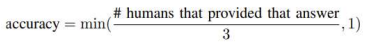

i.e; an answer is deemed 100% accurate if at least 3 workers/annotators
provided that exact answer.

Additionally, if the problem is posed as a simple k-class classification problem then the regular accuracy metric can also be used for evaluation.

## 2.3 Real World Constraints:

There are no strict latency requirements considering that the problem is still in research phase.

## 2.4 Understanding the VQA problem:

Solving the VQA problem involves four major steps:

1. **Image featurization**: Encoding the information in the image.
2. **Question featurization**: Encoding the information in the natural language questions.
3. **Joint feature representation**: Combining/Fusing the information/features from both the image and the question.
4. **Answer generation**: Generating natural language answers utilizing the features generated.

Reference: https://blog.paperspace.com/introduction-to-visual-questionanswering/

### 2.4.1 Vanilla VQA model from the original VQA paper:
(https://arxiv.org/pdf/1505.00468.pdf)

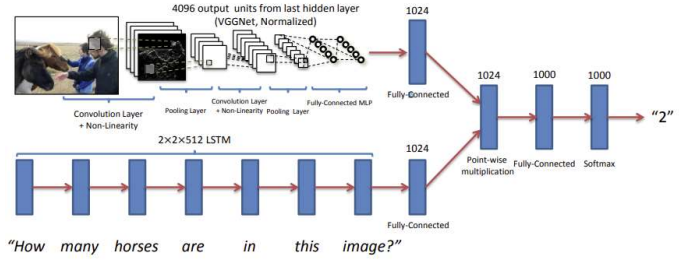

The paper considers the problem as a 'K-class classification problem', where K was chosen to be the top K = 1000 most frequent answers as the possible outputs.

This set of answers cover 82.67% of the
train+val answers in the dataset.

The model described in the research paper is considered as the 'baseline model' for VQA tasks.

It follows the same four major steps
described earlier:

1. **Image featurization**:
    - CNNs and CNN-based model architectures have become the de-facto standard for image featurization tasks. Many model architectures have evolved such as VGG16, Resnet50, InceptionV3, etc.
    - The paper uses transfer-learning via VGG16 pre-trained on Imagenet dataset for the image featurization. Transfer learning allows us to utilize the knowledge gained while solving a different related problem to the current problem.
    - The activations from the last hidden layer of VGGNet are used as 4096-dim image embedding. The image features are then L2 normalized. This is followed by a fully connected layer with relu activation to produce a 1024-dim feature.

2. **Text featurization**:
    - A two-layer LSTM to encode the questions to a 2048-dim embedding is used. The
embedding obtained from the LSTM is a concatenation of last cell state and last hidden state representations (each being 512-dim) from each of the two hidden layers of the LSTM. Hence 2 (hidden layers) x 2 (cell state and hidden state) x 512 (dimensionality of each of the cell states, as
well as hidden states).
    - Each question word is encoded to a 300-dim embedding by a fully-connected layer + tanh non-linearity which is then fed to the LSTM.
    - The input vocabulary to the embedding layer consisted of all the question words seen in the training dataset. The LSTM embeddings are passed to a fully connected layer with relu activation to produce a 1024-dim feature.

3. **Joint feature representation**:

    Now that both the image and text features are transformed to a common 1024-dim, both the vectors are fused via '*element-wise multiplication*'.

4. **Answer generation**:

    The joint feature representation is then passed through fully connected layers to generate a softmax distribution over the 'K' output answer classes. Finally, the answer class with the highest probability is considered as the answer.


### 2.4.2 Simple variants of the vanilla VQA model:

Given that the steps involved in solving the VQA task are generic, many simple variants of the vanilla VQA model can be obtained by using
different techniques at each step as shown below:

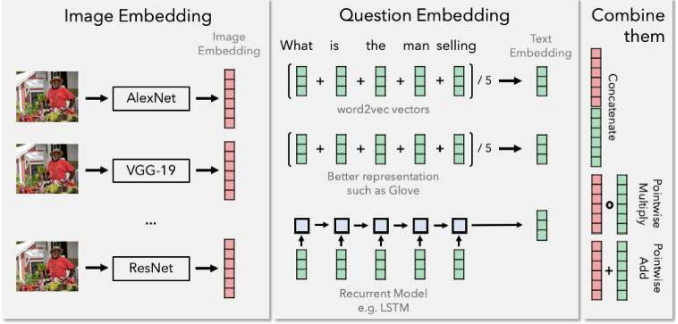

Source: https://blog.allenai.org/vanilla-vqa-adcaaaa94336

## 2.5 Dataset:

There are many datasets available for the VQA task. One among which is the MS COCO dataset.

The dataset can be downloaded from here: https://visualqa.org/download.html

In this case study, only the provided training set will be used for both training and validation.

The training set contains:
- 82,783 images.
- 443,757 questions, which averages for around 4-6 questions per image.
- 10 answers per question provided by unique annotators resulting in a total of 443,7570 answers.

<h2>Downloading and Extracting data:<h2/>

In [1]:
import os

!wget http://images.cocodataset.org/zips/train2014.zip
!7z x train2014.zip -o*
os.remove("train2014.zip")

!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
!7z x v2_Questions_Train_mscoco.zip -o*
os.remove("v2_Questions_Train_mscoco.zip")

!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
!7z x v2_Annotations_Train_mscoco.zip -o*
os.remove("v2_Annotations_Train_mscoco.zip")

--2023-01-02 08:25:42--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.138.201, 3.5.6.101, 52.217.91.193, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.138.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  9.28MB/s    in 19m 45s 

2023-01-02 08:45:28 (10.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 13510573713 bytes (13 GiB)

Extracting archive: train2014.zip
  4% 4096 Open              --
Path = train2014.zip
Type = zip
Physical Size

In [ ]:
# import shutil
# shutil.rmtree("sample_data")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Importing Libraries:<h2/>

In [3]:
import json
import re
import nltk
import cv2
nltk.download('punkt')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from prettytable import PrettyTable
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 3. Exploratory Data Analysis:

Loading the data:

In [4]:
img_dir = "train2014/train2014"
answers = json.load(open('v2_Annotations_Train_mscoco/v2_mscoco_train2014_annotations.json', 'r'))
questions = json.load(open('v2_Questions_Train_mscoco/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))

The annotation formats are as mentioned in the link: https://visualqa.org/download.html

## 3.1 Dataset overview:

In [5]:
print("Total number of images: ", len(os.listdir(img_dir)))
print("Total number of questions: ", len(questions['questions']))
print("Total number of answer annotations: ", len(answers['annotations']))
print("Total number of answers(not unique) given for a question: ",
      len(answers['annotations'][0]['answers']))

Total number of images:  82783
Total number of questions:  443757
Total number of answer annotations:  443757
Total number of answers(not unique) given for a question:  10


- Among the 10 answers to a question the most common answer is chosen as the correct answer to the question.

<h3>Converting the json annotations to pandas.DataFrame:<h3/>

In [6]:
# Converting the json annotations of question and answers to pandas.DataFrame
# and then merging them based on 'image_id' and 'question_id':
data_df = pd.merge(
    pd.DataFrame.from_records(questions['questions']),
    pd.DataFrame.from_records(answers['annotations']),
    how='left', on=['image_id', 'question_id']
)

# extract the list of 10 answers
data_df['answers'] = data_df['answers'].map(
    lambda x: [d['answer'] for d in x]
)
# get the image path corresponding to the 'image_id'
data_df['image_path'] = data_df['image_id'].apply(
    lambda x: os.path.join(
        img_dir, f"COCO_{answers['data_subtype']}_%012d.jpg"%(x))
)

# ordering columns
data_df = data_df[['image_path']+list(data_df.columns[:-1])]
data_df.drop(['image_id', 'question_id'], inplace=True, axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
data_df.head()

,image_path,question,question_type,multiple_choice_answer,answers,answer_type
0,train2014/train2014/COCO_train2014_00000045875...,What is this photo taken looking through?,what is this,net,"[net, net, net, netting, net, net, mesh, net, ...",other
1,train2014/train2014/COCO_train2014_00000045875...,What position is this man playing?,what,pitcher,"[pitcher, catcher, pitcher, pitcher, pitcher, ...",other
2,train2014/train2014/COCO_train2014_00000045875...,What color is the players shirt?,what color is the,orange,"[orange, orange, orange, orange, orange, orang...",other
3,train2014/train2014/COCO_train2014_00000045875...,Is this man a professional baseball player?,is this,yes,"[yes, yes, yes, yes, yes, no, yes, yes, yes, yes]",yes/no
4,train2014/train2014/COCO_train2014_00000026214...,What color is the snow?,what color is the,white,"[white, white, white, white, white, white, whi...",other


In [9]:
# # Saving the data
data_df.to_csv('/content/drive/MyDrive/Project/Visual_Question_Answering_BEST/data/data.csv', index=False)

In [11]:
# load the data
data_df = pd.read_csv('/content/drive/MyDrive/Project/Visual_Question_Answering_BEST/data/data.csv')

## 3.2 Example Datapoints:

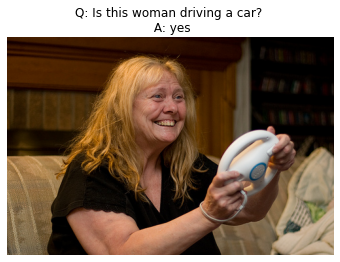

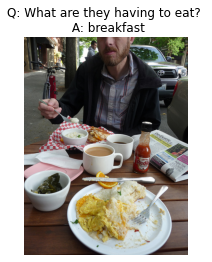

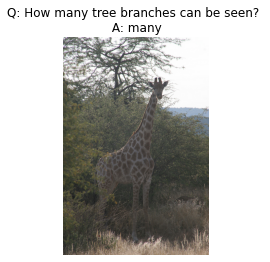

In [12]:
# No. of samples to show
n_samples = 3

# sample random
indices = np.random.choice(len(data_df), size=n_samples, replace=True)

# display the sample datapoints(Image, Question, Answers)
for idx in indices:
    plt.figure()
    plt.title(f"Q: {data_df.loc[idx, 'question']} \n A: {data_df.loc[idx, 'multiple_choice_answer']}")
    image = mpimg.imread(data_df.loc[idx, 'image_path'])
    plt.imshow(image)
    plt.axis('off')

**Observations:**
- We can see that the questions are open-ended and the answers contain numbers(for counts), yes/no(binary) and words/phrases/sentences. etc.
- The images and the questions do not belong to a particular domain.
- We can see that the image widths and image heights are not the same for all the images. Thus, it would require us to bring them to a common shape as part of pre-processing.

## 3.3 Answers:

### 3.3.1 Distribution of number of words in answers:

In [13]:
# calculating the count of words for every answer
ans_word_count = data_df['multiple_choice_answer'].apply(
    lambda x: len(word_tokenize(x)))

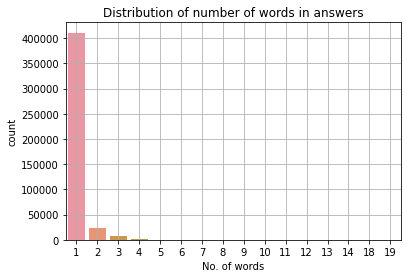

In [14]:
sns.countplot(x=ans_word_count)
plt.title("Distribution of number of words in answers")
plt.xlabel("No. of words")
plt.grid()
plt.show()

**Observations:**
- We can see that most of the answers have 1-3 words in them.

**For this case-study limiting the problem to 1 word answers.**

In [15]:
# choosing samples with only 1 word answers
data_df = data_df[ans_word_count == 1]
data_df.shape

(410857, 6)

**All the EDA below is now limited to only samples with 1-word answers**

### 3.3.2 Distribution of answer_types:

In [16]:
print("Different answer types:", data_df['answer_type'].unique())

Different answer types: ['other' 'yes/no' 'number']


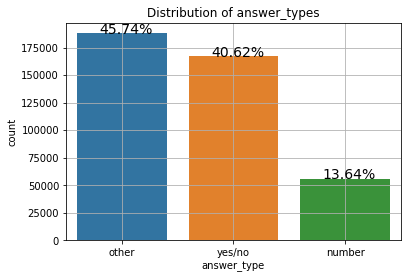

In [17]:
ax = sns.countplot(data=data_df, x='answer_type')

# Annotating
for p in ax.patches:
    ax.annotate(
        '{:.2f}%'.format(
        (p.get_height()/len(data_df))*100),
        (p.get_x()+0.2, p.get_height()),
        size=14
    )

plt.title("Distribution of answer_types")
plt.grid()
plt.show()

- 40.62% of all the answers are belonging to questions expecting a binary yes/no answer.
- 13.64% are numbers and the remaining 45.74%  correspond to all the other one word answers.

### 3.3.3 Distribution of answer frequency:

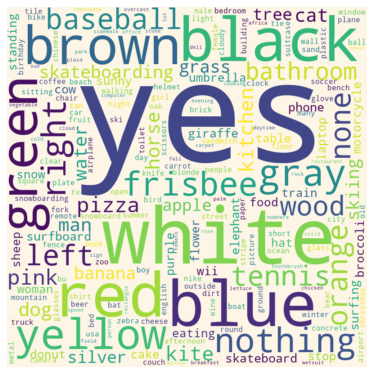

In [18]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
wc = WordCloud(width = 800, height = 800, background_color='oldlace',
               collocations = False, min_font_size = 10)
wc.generate(" ".join(data_df['multiple_choice_answer'].values.ravel()))

# plot the WordCloud image
plt.figure(figsize=(8,5), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Observations:**
- "yes" is the most frequent answer that appears. This corresponds to questions expecting a binary yes/no answer.
- We can also see that colors appear frequently too. This indicates that there are a lot of questions asking for the color of some element in an image.

In [19]:
# computing frequency of one-word answers
one_word_ans_freq = data_df['multiple_choice_answer'].value_counts()

print("Total number of unique one-word answers: ",
      one_word_ans_freq.keys().nunique())

Total number of unique one-word answers:  10223


### 3.3.4 CDF of answers:

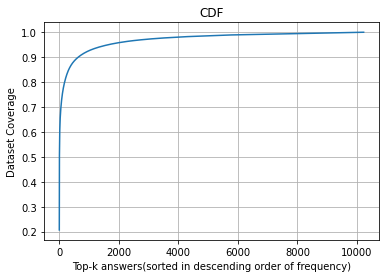

+----------+--------------+------------------+
| Answers  | Answer count | Dataset Coverage |
+----------+--------------+------------------+
| Top_100  |     349      |      74.95       |
| Top_300  |     120      |      84.56       |
| Top_500  |      56      |      88.45       |
| Top_700  |      35      |      90.59       |
| Top_900  |      25      |      92.05       |
| Top_1000 |      22      |      92.62       |
| Top_1300 |      15      |      93.93       |
| Top_1500 |      12      |      94.59       |
+----------+--------------+------------------+


In [20]:
# Calculating cumulative distribution of answers
ans_frac = one_word_ans_freq / np.sum(one_word_ans_freq)
ans_cum_sum = np.cumsum(ans_frac)

# plotting
sns.lineplot(x=np.arange(len(ans_cum_sum)), y=ans_cum_sum)
plt.grid()
plt.xlabel('Top-k answers(sorted in descending order of frequency)')
plt.ylabel('Dataset Coverage')
plt.title("CDF")
plt.show()

# Calculating % of the dataset covered by each answer
x = PrettyTable()
x = PrettyTable(["Answers", "Answer count", "Dataset Coverage"])
top_x = [100, 300, 500, 700, 900, 1000, 1300, 1500]
for i in top_x:
    x.add_row([f'Top_{i}', one_word_ans_freq[i], np.round(ans_cum_sum[i]*100, 2)])
print(x)

**Observations:**
- Most of the dataset is covered by few of the answers.
- The top 100 most frequently occurring answers cover ~75% of the whole dataset.
- For this case-study we can choose only the samples whose answers are part of the top 100 most frequent answers. Doing so would make k=100 and the task can be formulated as a 100-class classification problem.

In [21]:
# choosing samples whose answers are part of the top 100 most frequent answers
data_df = data_df[data_df['multiple_choice_answer'].isin(one_word_ans_freq[:100].keys())]
data_df.shape

(307568, 6)

### 3.3.5 Distribution of answer_types among the Top-100 most frequent one-word answers:

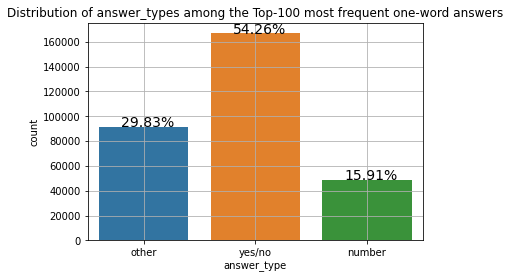

In [22]:
ax = sns.countplot(data=data_df, x='answer_type')

# Annotating
for p in ax.patches:
    ax.annotate(
        '{:.2f}%'.format(
        (p.get_height()/len(data_df))*100),
        (p.get_x()+0.2, p.get_height()),
        size=14
    )

plt.title("Distribution of answer_types among the Top-100 most frequent one-word answers")
plt.grid()
plt.show()

### 3.3.6 Frequency of Top-20 answers:

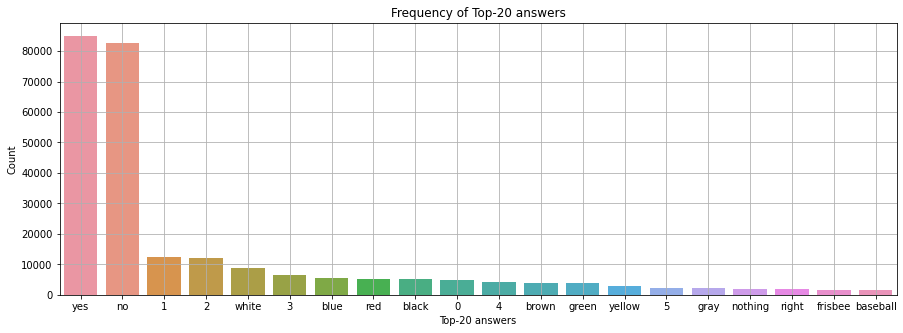

In [23]:
top_k=20

plt.figure(figsize=(15, 5))
sns.barplot(
    x=one_word_ans_freq[:top_k].keys(), y=one_word_ans_freq[:top_k].values)
plt.title(f"Frequency of Top-{top_k} answers")
plt.xlabel("Top-20 answers")
plt.ylabel("Count")
plt.grid()
plt.show()

**Observations:**
- Now we can see that the samples with binary yes/no answers form the majority 54.26% of the dataset.
- Apart from 'yes' and 'no' we see numbers and colors being part of the top most frequent answers. This indicates that there are a lot of questions asking for the count and the color of some element in an image.

In [25]:
# Saving the data
data_df.to_csv('/content/drive/MyDrive/Project/Visual_Question_Answering_BEST/data/data2.csv', index=False)

In [26]:

# load the data
data_df = pd.read_csv('/content/drive/MyDrive/Project/Visual_Question_Answering_BEST/data/data2.csv')

## 3.4 Questions:

The annotations released has the following cleaning steps already done on the raw crowdsourced data:
- Spelling correction (using Bing Speller) of question and answer strings
- Question normalization (first char uppercase, last char ‘?’)
- Answer normalization (all chars lowercase, no period except as decimal point, number words —> digits, strip articles (a, an the))
- Adding apostrophe if a contraction is missing it (e.g., convert "dont" to "don't")

Source: [link](https://visualqa.org/download.html#:~:text=from%20here.-,Overview,-The%20annotations%20we)

In [27]:
data_df['question'].sample(10)

32762                             What color is the plate?
242740    What gender is the youngest person in the image?
190149              What is the child wearing on his head?
96614                            Can you see what's on TV?
275690                               Is that urinal clean?
49934                    How many street lights are there?
122640                                  Is he upside down?
225653             How many elephants are in this picture?
272524                                What is on the boat?
110977                            Is this animal tethered?
Name: question, dtype: object

**Observations:**
- The questions look clean and short.
- There are a few word contractions such as "that's" and possessives such as "man's". These need to be handled carefully.
- We can remove any special characters such as '?' etc unless we don't plan on including them for featurization.

### 3.4.1 Removing Contractions:

To remove contraction here I use a module called '[contractions](https://github.com/kootenpv/contractions)'. There are few other packages such '[pycontractions](https://pypi.org/project/pycontractions/)', etc which can also be used.

In [28]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 42.8 MB/s 


In [29]:
import contractions

print("="*50)
print("you're happy now =>", contractions.fix("you're happy now"))
print("="*50)
print("Ram's dog =>", contractions.fix("Ram's dog"))
print("="*50)
print("I'll be there =>", contractions.fix("I'll be there"))

you're happy now => you are happy now
Ram's dog => Ram's dog
I'll be there => I will be there


### 3.4.2 Cleaning questions:

Clean the questions by fixing contractions, lowering the text and removing any special characters.

In [30]:
def preprocess_questions(text):
    """
    Clean the questions by fixing contractions, lowering the text and removing
    any special characters.
    """
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text

In [31]:
data_df['question'] = data_df['question'].apply(lambda x: preprocess_questions(x))

data_df['question'].sample(10)

109618                       is that building a restaurant 
103315    the area to the right of the tracks is for sto...
101617                          what color are their coats 
54936                                what color is the cat 
120317                          what cold is on the ground 
200232                                 is this in colorado 
291119                     does this bicycle have a basket 
266767        what color is the second furthest away bench 
277329                                      how many trees 
280528    why is the dog s front paw raised off the ground 
Name: question, dtype: object

### 3.4.3 Distribution of number of words in questions:

In [32]:
# calculating the count of words for every question
question_word_count = data_df['question'].apply(
    lambda x: len(word_tokenize(x)))

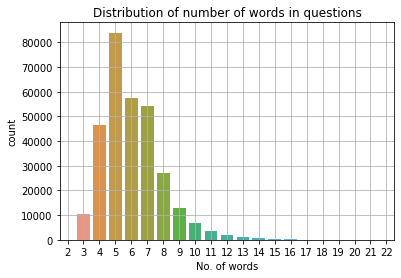

In [33]:
sns.countplot(x=question_word_count)
plt.title("Distribution of number of words in questions")
plt.xlabel("No. of words")
plt.grid()
plt.show()

**Observations:**
- Most questions are short and have only a few words in them.

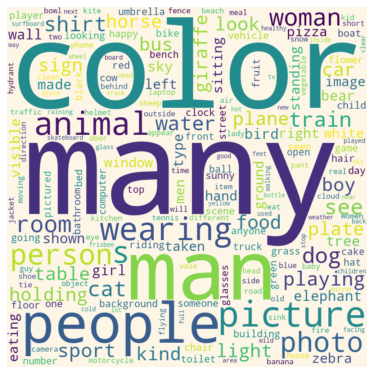

In [34]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
wc = WordCloud(width = 800, height = 800, background_color='oldlace',
               collocations = False, min_font_size = 10)
wc.generate(" ".join(data_df['question'].values.ravel()))

# plot the WordCloud image
plt.figure(figsize=(8,5), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Observations:**
- Above we can see that the words 'color' and 'many' have appeared a lot of times indicating that there are a lot of questions asking for the color and count of some element in an image. This was also observed when analyzing the answers earlier.

### 3.4.4 Distribution of question_types:

In [35]:
print("Total number of unique question_type: ", data_df['question_type'].nunique())

Total number of unique question_type:  65


In [36]:
data_df['question_type'].unique()

array(['what color is the', 'is this', 'what is the person',
       'what is in the', 'is the', 'is there', 'is', 'is the man',
       'none of the above', 'does the', 'are the', 'was', 'what is this',
       'how many', 'what color is', 'what is the man', 'what is on the',
       'how many people are in', 'is there a', 'is it', 'is the person',
       'what is the', 'is this a', 'what', 'are there', 'has', 'could',
       'are', 'are they', 'are these', 'how many people are',
       'what color are the', 'where are the', 'which', 'do',
       'what is the color of the', 'what color', 'what sport is',
       'what are the', 'does this', 'is the woman', 'where is the',
       'are there any', 'is that a', 'what kind of', 'what is',
       'what type of', 'is this an', 'do you', 'what are',
       'is this person', 'can you', 'is he', 'how', 'what brand',
       'what is the name', 'who is', 'why is the', 'what animal is',
       'what does the', 'what number is', 'what room is',
       

In [37]:
# Calculating frequency of question_types
question_type_freq = data_df['question_type'].value_counts()

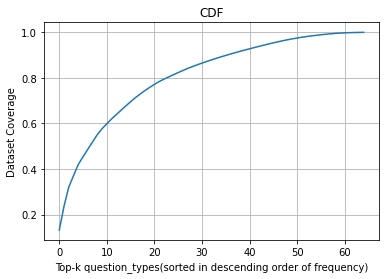

In [38]:
# Calculating cumulative distribution of question_types
ques_frac = question_type_freq / np.sum(question_type_freq)
ques_cum_sum = np.cumsum(ques_frac)

# Plotting
sns.lineplot(x=np.arange(len(ques_cum_sum)), y=ques_cum_sum)
plt.xlabel('Top-k question_types(sorted in descending order of frequency)')
plt.ylabel('Dataset Coverage')
plt.title("CDF")
plt.grid()
plt.show()

**Observations:**
- The question_types do not have a huge skew. ie; most of the dataset do not belong just a few question_types.

### 3.4.5 Frequency of Top-30 question_types:

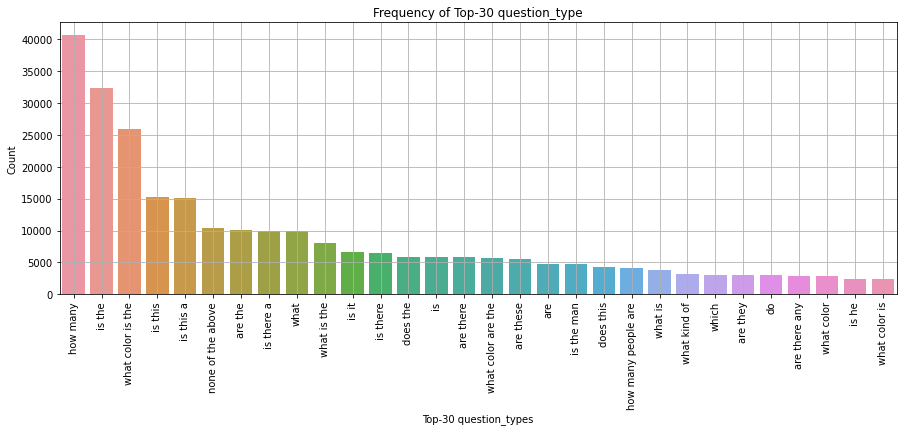

In [39]:
top_k=30

plt.figure(figsize=(15, 5))
sns.barplot(
    x=question_type_freq[:top_k].keys(), y=question_type_freq[:top_k].values)
plt.title(f"Frequency of Top-{top_k} question_type")
plt.xticks(rotation=90)
plt.xlabel("Top-30 question_types")
plt.ylabel("Count")
plt.grid()
plt.show()

**Observations:**
- The above question types solidify our previous observations that there are a lot of questions asking for color and count.

### 3.4.6 Distribution of answers_types for the Top-30 question_types:

In [40]:
top_k=30

# Calculating frequency of answer_types for Top-k questions_types
top_k_ques_types = question_type_freq[:top_k].keys()
ques_vs_ans_type_df = pd.DataFrame(index=top_k_ques_types,
                       columns=data_df['answer_type'].unique()
                    )

for ques_type in top_k_ques_types:
    for ans_type in data_df['answer_type'].unique():
        ques_vs_ans_type_df.loc[ques_type][ans_type] = data_df[
            (data_df['question_type']==ques_type) & (data_df['answer_type']==ans_type)
        ].shape[0]

In [41]:
ques_vs_ans_type_df.head()

,other,yes/no,number
how many,111,0,40496
is the,701,31584,11
what color is the,25883,0,0
is this,147,15148,7
is this a,340,14798,6


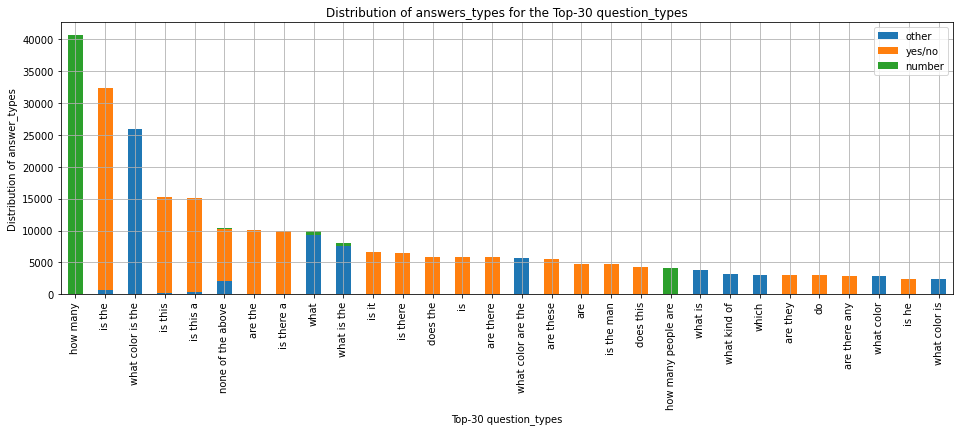

In [42]:
ques_vs_ans_type_df.plot.bar(rot=90, stacked=True, figsize=(16, 5))
plt.xlabel("Top-30 question_types")
plt.ylabel("Distribution of answer_types")
plt.title("Distribution of answers_types for the Top-30 question_types")
plt.grid()
plt.show()

**Observations:**
From the above plot we can see the below pattern:
- Most of the questions starting with "is", "are", "does" correspond to questions with binary yes/no answers.
- Most questions starting with "how" are related to count based questions and have numbers as their answers.
- Most of the questions starting with "what", "which" correspond to other one-word answers.

## 3.5 Images:

### 3.5.1 Distribution of Image widths, heights and depths:

As seen earlier in [this](#scrollTo=qFmC68injQ76) section, all the images do not have the same dimensions.

In [43]:
img_shapes = data_df['image_path'].map(lambda x: mpimg.imread(x).shape)

In [44]:
print("Number of unique dimensions: ", set(map(len, img_shapes)))

Number of unique dimensions:  {2, 3}


**Observations:**
- Few of the images do not have depth/channels, these could be gray scale images.

In [45]:
img_heights = np.asarray([img_shape[0] for img_shape in img_shapes])
img_widths = np.asarray([img_shape[1] for img_shape in img_shapes])

print("Number of unique values in heights: ", len(set(img_heights)))
print("Number of unique values in widths: ", len(set(img_widths)))

Number of unique values in heights:  503
Number of unique values in widths:  439


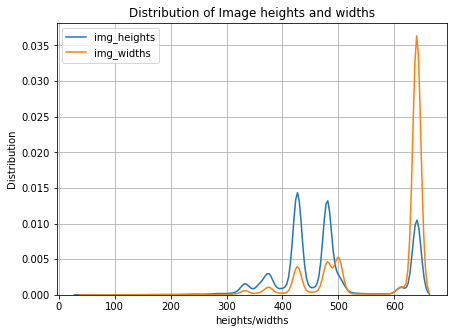

In [46]:
plt.figure(figsize=(7,5))
sns.kdeplot(img_heights, label="img_heights")
sns.kdeplot(img_widths, label="img_widths")
plt.title('Distribution of Image heights and widths')
plt.xlabel('heights/widths')
plt.ylabel('Distribution')
plt.legend()
plt.grid()
plt.show()

In [47]:
print("Image widths below 100: ", img_widths[img_widths < 100])
print("Image heights below 100: ", img_heights[img_heights < 100])

Image widths below 100:  [72 72 72 59 59]
Image heights below 100:  [51 51 51 72 72]


**Observations:**
- It should be noted that while most images have large sizes there are a few images with smaller widths and heights as seen above, these images could lose resolution if enlarged to a bigger size while preprocessing for model training.

## 3.6 Summarized Observations from EDA:

- Dataset Overview:
    - The questions are open-ended and the answers are either numbers(for counts), yes/no(binary) or words/phrases/sentences. etc.
    - The images and the questions do not belong to a particular domain.
    - Every question has 10 answers given by different annotators. The most common answer among them is chosen as the correct answer to the question.
- Answers:
    - Most of the answers had 1-3 words in them. Thus, due to resource constraints we can limit the problem to 1-word answers.
    - After filtering the datset to contain only the samples with 1-word answers, we can see that a few of the answers cover most of the dataset.
    - "yes" is the most frequent answer that appears. This corresponds to questions expecting a binary yes/no answer. This is followed by answers containing colors. This indicates that there are a lot of questions asking for the color of some element in an image.
    - There are a total of 10,223 unique one-word answers. To pose the task as a k-class classification problem the dataset needs to be filtered out to select only a few classes/answers due to resource constraints.
    - The top-100 most frequently occuring answers cover ~75% of the whole dataset. Thus, the problem is posed as a 100-class classification problem and the dataset is filtered to contain samples whose answers are part of the top-100 answers.
    - After all of the above filtering, the dataset now has binary yes/no answers as the majority 54.26%. Apart from 'yes' and 'no' we see numbers and colors being part of the top-100 most frequent answers. This indicates that there are a lot of questions asking for the count and the color of some element in an image.
- Questions:
    - The annotations are a result of the following cleaning steps already performed on the raw data:
        - Spelling correction (using Bing Speller) of question and answer strings.
        - Question normalization (first char uppercase, last char ‘?’).
        - Answer normalization (all chars lowercase, no period except as decimal point, number words —> digits, strip articles (a, an the)).
        - Adding apostrophe if a contraction is missing it (e.g., convert "dont" to "don't").
    - The questions are clean and short. There are a few word contractions such as "that's", possessives such as "man's" and special symbols such as "?". These need to be cleaned carefully.
    - Most questions have only a few words and contain the words 'color' and 'many' frequently in them. This solidifies the previous observations made that there are a lot of questions asking for count and color of some element in an image.
    - The questions also followed the below pattern:
        - Most of the questions starting with "is", "are", "does" correspond to questions with binary yes/no answers.
        - Most of the questions starting with "how" are related to count based questions and have numbers as their answers.
        - Most of the questions starting with "what", "which" correspond to other one-word answers(such as colors).
- Images:
    - All the images are not of the same shape.
    - Few of the image arrays do not have channels/depth. These could be gray scaled images.
    - It should be noted that while most images have large sizes, there are a few images with smaller widths and heights. These images could lose resolution if enlarged to a bigger size while preprocessing for model training.